In [120]:
library(tidyverse)
library(ggplot2)
raw_data <- read.csv("../data-raw/raw_data.csv")


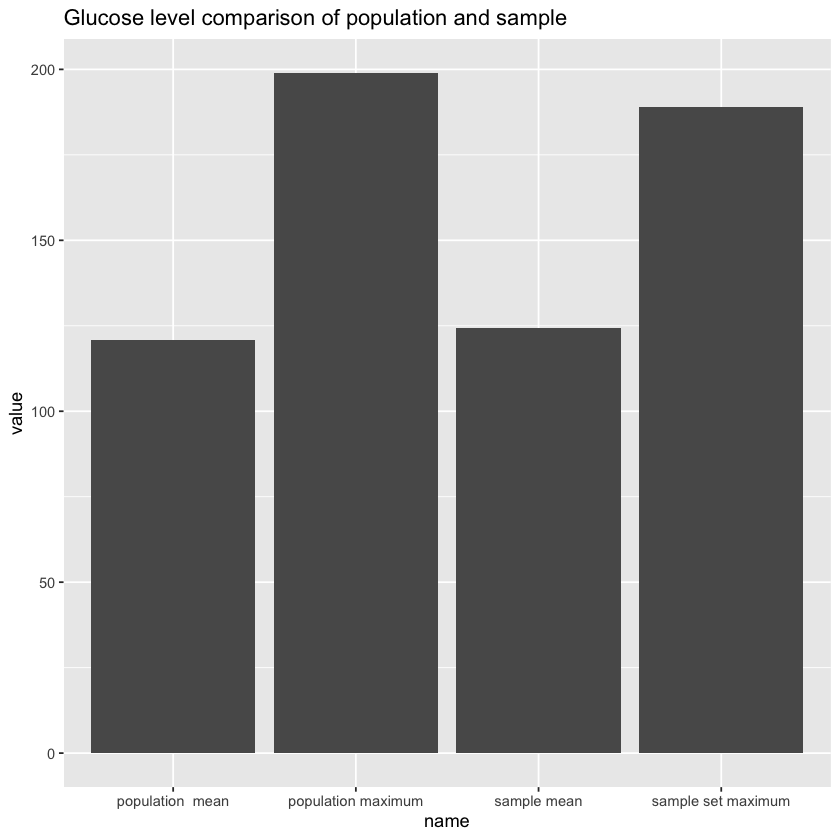

In [121]:
set.seed(1959)
sampled_data <- raw_data %>%slice_sample(n=25)

sampled_data_glucose_mean <- mean(sampled_data$Glucose)
sampled_data_glucose_max <- max(sampled_data$Glucose)
raw_data_glucose_mean <- mean(raw_data$Glucose)
raw_data_glucose_max <- max(raw_data$Glucose)
data <- data.frame(
  name=c("sample mean","population  mean","sample set maximum","population maximum") ,  
  value=c(sampled_data_glucose_mean,raw_data_glucose_mean,sampled_data_glucose_max,raw_data_glucose_max)
  )
ggplot(data, aes(x=name,y=value)) +  geom_bar(stat = "identity") + ggtitle("Glucose level comparison of population and sample")

Above plot indicates comparison of stats of glucose of sampled set and population set (mean, maximum).

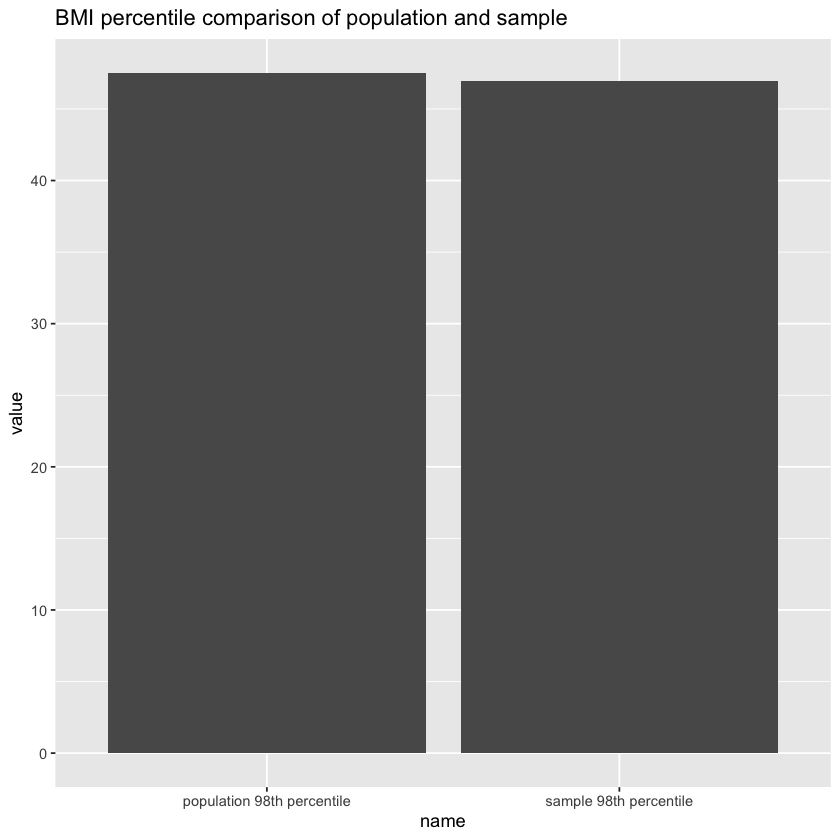

In [122]:
sample_data_BMI = quantile(sampled_data$BMI,0.98)
poulation_data_BMI = quantile(raw_data$BMI,0.98)
mean_data <- data.frame(
  name=c("sample 98th percentile","population 98th percentile") ,  
  value=c(sample_data_BMI,poulation_data_BMI))
ggplot(mean_data, aes(x=name,y=value)) +  geom_bar(stat = "identity") + ggtitle("BMI percentile comparison of population and sample")

Above plot shows us 98th percentile comparison of blood pressure of sampled vs population data.

In [115]:
final <- 1:500 %>% map_dfr(
    ~raw_data %>% slice_sample(n=150,replace = TRUE) %>% summarize(
        mean_blood_pleasure = mean(BloodPressure),
        median_blood_pleasure = median(BloodPressure),
        lower_percentile_blood_pleasure = quantile(BloodPressure,0.25),
        higher_percentile_blood_pleasure = quantile(BloodPressure,0.75),
        standard_dev_blood_pleasure = sd(BloodPressure)
        )
     ) %>% mutate(n=150)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


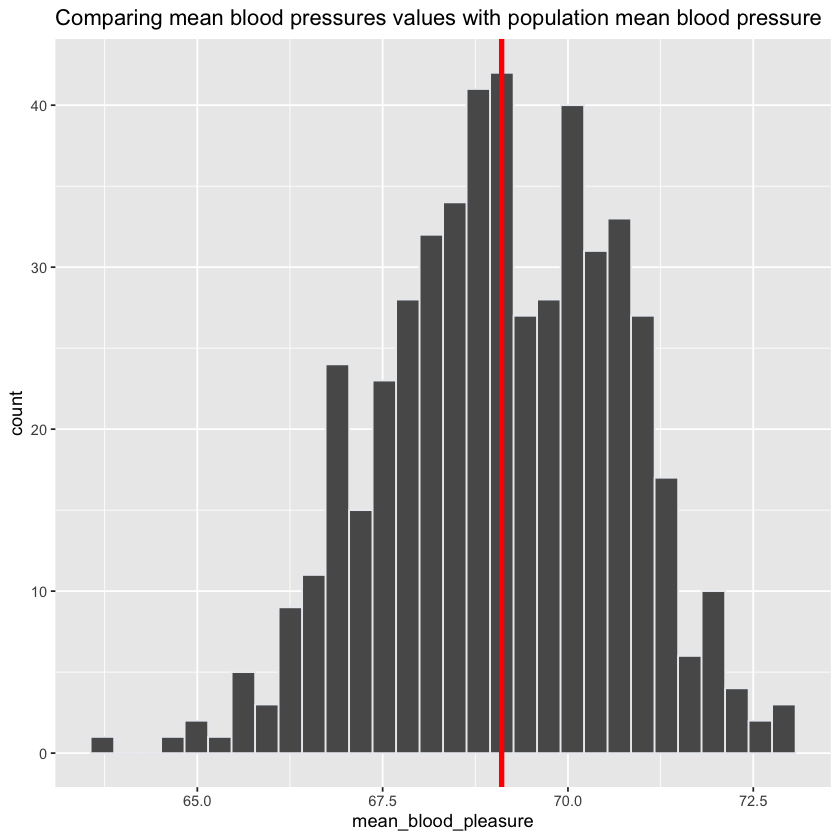

In [116]:
ggplot(data = final, aes(x = mean_blood_pleasure)) +
  geom_histogram(color="#e9ecef") + geom_vline(xintercept=mean(raw_data$BloodPressure), 
                color = "red", size=1.5) + ggtitle("Comparing mean blood pressures values with population mean blood pressure ")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


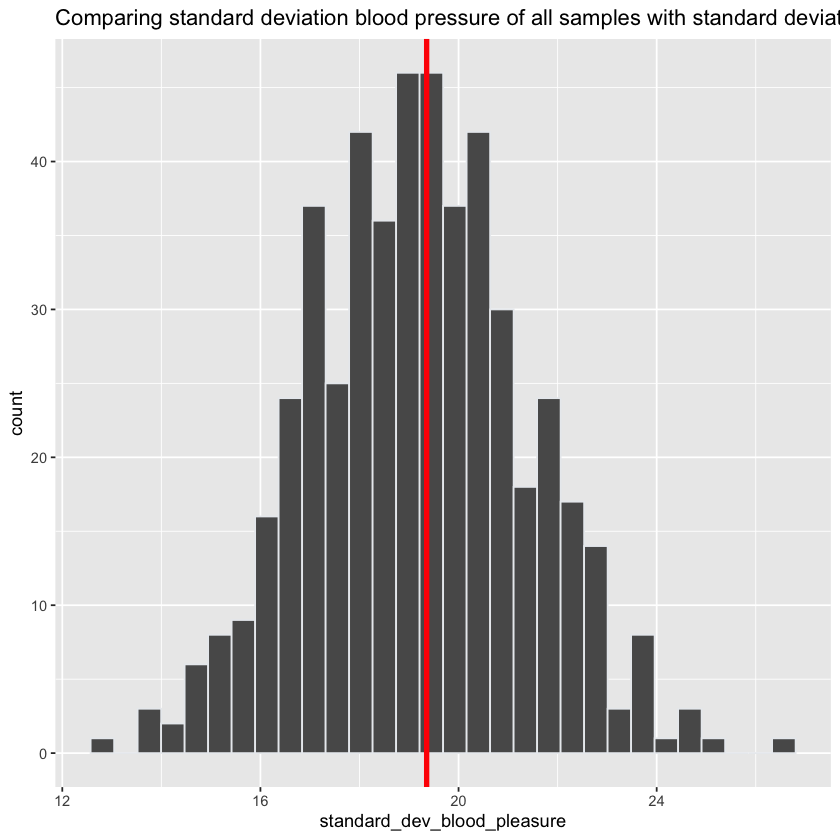

In [110]:
ggplot(data = final, aes(x = standard_dev_blood_pleasure)) +
  geom_histogram(color="#e9ecef") + geom_vline(xintercept=sd(raw_data$BloodPressure), 
                color = "red", size=1.5) + ggtitle("Comparing standard deviation blood pressure of all samples with standard deviation of population ")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


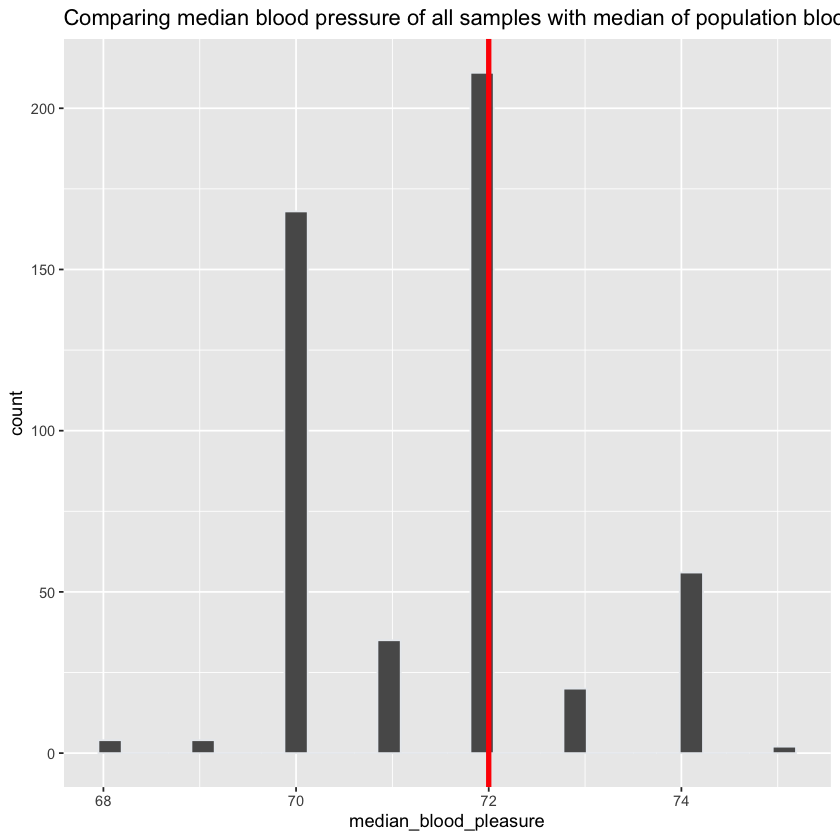

In [109]:
ggplot(data = final, aes(x = median_blood_pleasure)) +
  geom_histogram(color="#e9ecef") + geom_vline(xintercept=median(raw_data$BloodPressure), 
                color = "red", size=1.5) + ggtitle("Comparing median blood pressure of all samples with median of population blood pressure")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


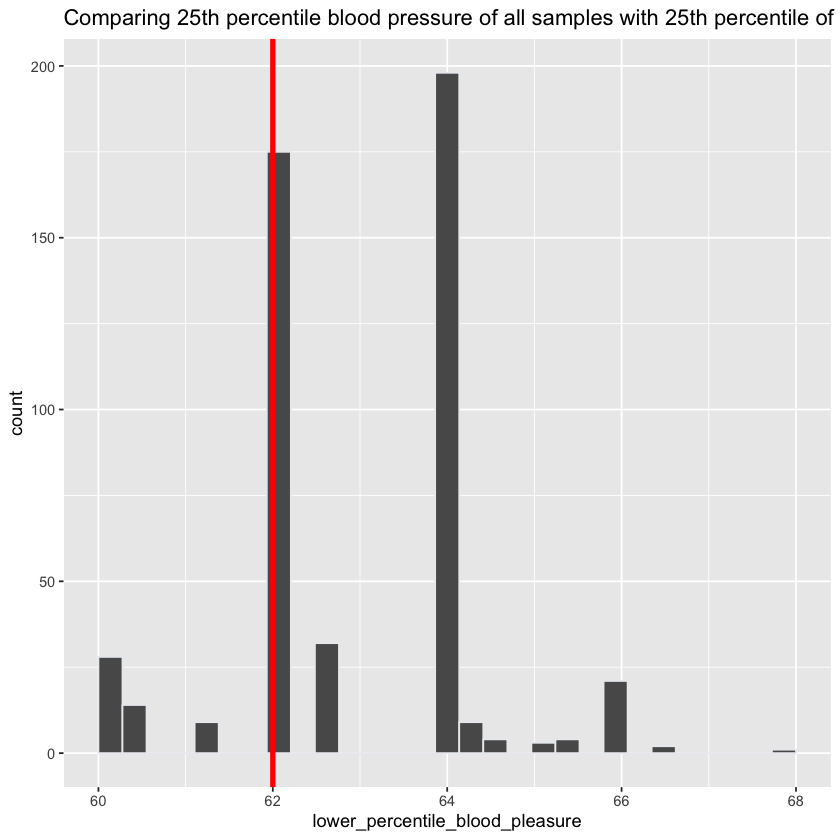

In [108]:
ggplot(data = final, aes(x = lower_percentile_blood_pleasure)) +
  geom_histogram(color="#e9ecef") + geom_vline(xintercept=quantile(raw_data$BloodPressure,0.25), 
                color = "red", size=1.5) + ggtitle("Comparing 25th percentile blood pressure of all samples with 25th percentile of population blood pressure")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


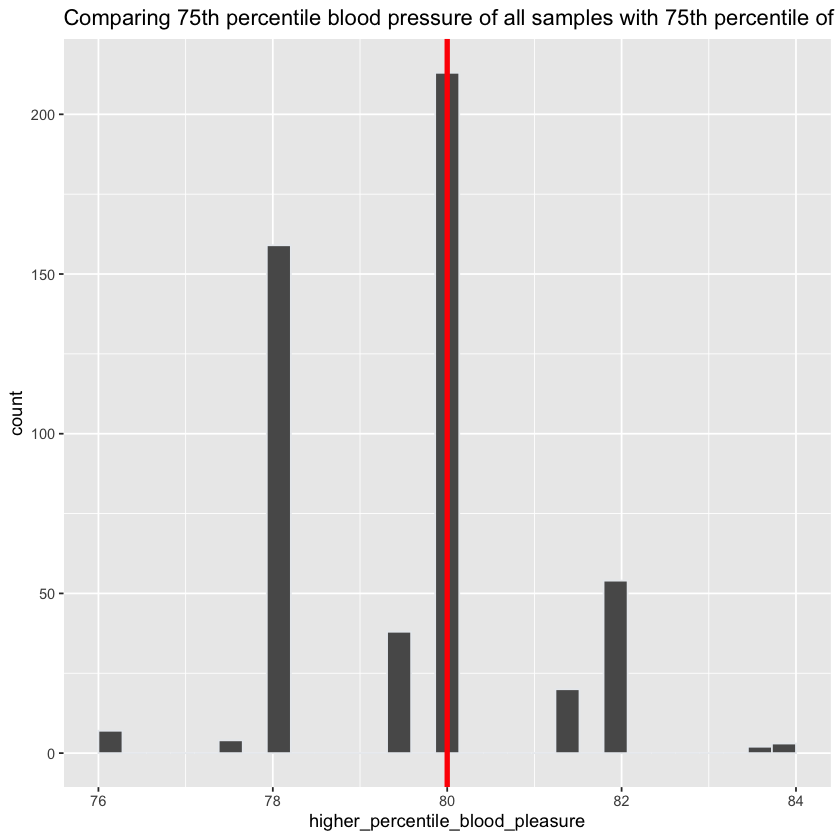

In [112]:
ggplot(data = final, aes(x = higher_percentile_blood_pleasure)) +
  geom_histogram(color="#e9ecef") + geom_vline(xintercept=quantile(raw_data$BloodPressure,0.75), 
                color = "red", size=1.5) + ggtitle("Comparing 75th percentile blood pressure of all samples with 75th percentile of population blood pressure")


Above 4 plots indicate stats(mean, median, 25th percentile, 75th percentile, standard deviation) comparision of 500 samples with 150 observations each against stats of overall population. 

From mean plot we can understand that actual mean of population is mostly repeated for all samples.
from standard deviation plot we can say that deviation values is spread evenly around std.deviation of population.
most frequent median of samples matches actual median of all population.